* Explanation of Each Part

    - Data Loading and Exploration:

        + Load the dataset.
        + Display basic information and descriptive statistics.
        + Check for and handle missing values.

    - Data Preprocessing:

        + Split the dataset into features (X) and target (y).
        + Split the data into training and testing sets.

    - Handling Imbalanced Data with SMOTE:

        + Apply SMOTE to address class imbalance.

    - Feature Scaling:

        + Standardize the features using StandardScaler.

    - Logistic Regression Model Training and Evaluation:

        + Train a Logistic Regression model.
        + Evaluate the model using classification metrics.

    - Hyperparameter Tuning with GridSearchCV:

        + Perform hyperparameter tuning using GridSearchCV.
        + Evaluate the best model obtained from the grid search.

    - Feature Importance Analysis with RandomForestClassifier:

        + Train a Random Forest model.
        + Extract and display feature importance.

    - Visualization:

        + Visualize the top 10 most important features.
        + Plot correlation matrix.
        + Plot per column distribution for selected columns.

# Part 1: Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\medam\OneDrive\Bureau\Codsoft\Credit Card Fraud Detection\creditcard.csv")


In [3]:
# Basic Data Exploration
print("Dataset Information:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [4]:
# Check for missing values
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing Values in Each Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Handle missing values (if any)
if missing_values.any():
    print("Dropping rows with missing values")
    df = df.dropna()

# Part 2: Data Preprocessing

In [6]:

# Split features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



# Part 3: Handling Imbalanced Data with SMOTE

In [7]:

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
print("Applying SMOTE to balance the dataset")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



Applying SMOTE to balance the dataset


# Part 4: Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
print("Standardizing the features")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

Standardizing the features


# Part 5: Logistic Regression Model Training and Evaluation

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """Evaluate the model and print performance metrics."""
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    return y_pred

# Train Logistic Regression model
print("Training Logistic Regression model")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train_smote)

# Evaluate Logistic Regression
evaluate_model(logreg, X_test_scaled, y_test, "Logistic Regression")

Training Logistic Regression model

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix:
 [[56299   565]
 [   10    88]]
ROC AUC Score: 0.9440115980269429


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Part 6: Hyperparameter Tuning with GridSearchCV

In [10]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for tuning
print("Hyperparameter tuning with GridSearchCV")
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train_smote)

# Use the best model for prediction and evaluation
best_model = grid_search.best_estimator_
evaluate_model(best_model, X_test_scaled, y_test, "Best Logistic Regression")

Hyperparameter tuning with GridSearchCV


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_lo


Best Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.14      0.90      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix:
 [[56303   561]
 [   10    88]]
ROC AUC Score: 0.9440467696645345


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Part 7: Feature Importance Analysis with RandomForestClassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
print("Training Random Forest model for feature importance analysis")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_smote)

# Extract feature importance
importance = rf_model.feature_importances_
feature_names = X.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance Analysis:")
print(feature_importance_df)

Training Random Forest model for feature importance analysis

Feature Importance Analysis:
   Feature  Importance
14     V14    0.216958
10     V10    0.119784
4       V4    0.116715
12     V12    0.107274
17     V17    0.086577
3       V3    0.071630
11     V11    0.049677
16     V16    0.040101
2       V2    0.038871
9       V9    0.028266
21     V21    0.014581
7       V7    0.013130
1       V1    0.009604
0     Time    0.008231
18     V18    0.008089
6       V6    0.007564
8       V8    0.007002
13     V13    0.006537
27     V27    0.005480
19     V19    0.004798
28     V28    0.004415
26     V26    0.004337
5       V5    0.004334
20     V20    0.004304
29  Amount    0.004111
22     V22    0.004020
15     V15    0.003873
23     V23    0.003456
24     V24    0.003178
25     V25    0.003103


# Part 8: Visualization

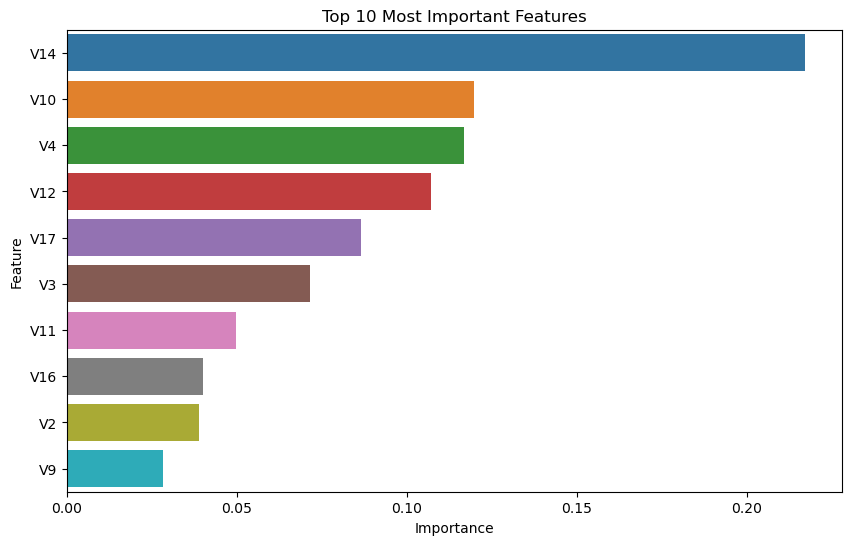

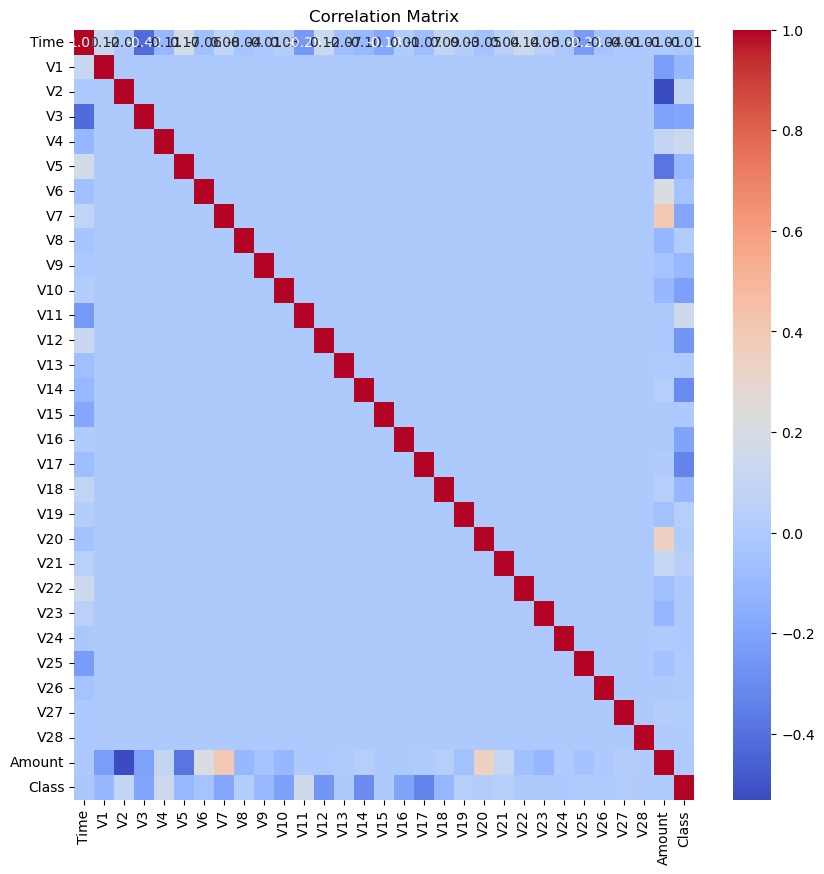

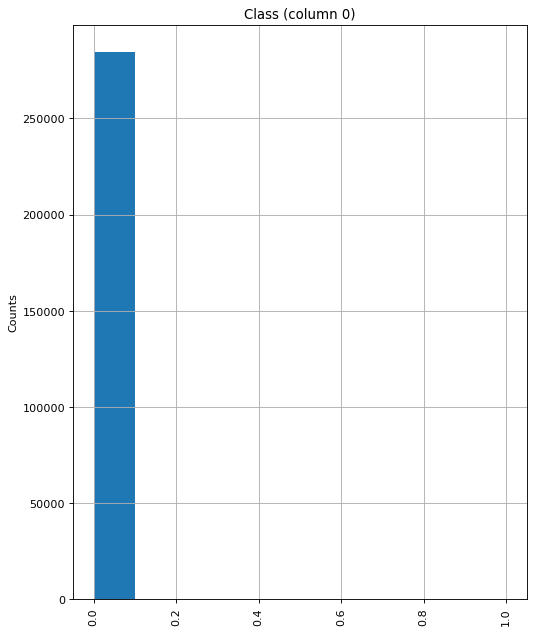

In [12]:
# Visualization of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:10])
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Function to plot correlation matrix
def plot_correlation_matrix(df, graph_width):
    """Plot correlation matrix."""
    plt.figure(figsize=(graph_width, graph_width))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

plot_correlation_matrix(df, 10)

# Function to plot per column distribution
def plot_per_column_distribution(df, n_graph_shown, n_graph_per_row):
    """Plot per column distribution for columns with 1 to 50 unique values."""
    nunique = df.nunique()
    df = df[[col for col in df if 1 < nunique[col] < 50]]  # Filter columns with unique values
    n_row, n_col = df.shape
    column_names = list(df)
    n_graph_row = int(np.ceil(n_col / n_graph_per_row))
    plt.figure(figsize=(6 * n_graph_per_row, 8 * n_graph_row), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(n_col, n_graph_shown)):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_df = df.iloc[:, i]
        if not column_df.empty and not column_df.isnull().all():
            if not column_df.dtype.kind in 'bifc':
                column_df = column_df.astype(float)
            column_df.hist()
        plt.ylabel('Counts')
        plt.xticks(rotation=90)
        plt.title(f'{column_names[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

plot_per_column_distribution(df, 10, 5)
